Epoch 1/10
469/469 [==============================] - 87s 186ms/step - loss: 0.1306 - accuracy: 0.9598
Epoch 2/10
469/469 [==============================] - 88s 188ms/step - loss: 0.0362 - accuracy: 0.9887
Epoch 3/10
469/469 [==============================] - 85s 182ms/step - loss: 0.0225 - accuracy: 0.9930
Epoch 4/10
469/469 [==============================] - 83s 177ms/step - loss: 0.0152 - accuracy: 0.9952
Epoch 5/10
469/469 [==============================] - 82s 175ms/step - loss: 0.0124 - accuracy: 0.9960
Epoch 6/10
469/469 [==============================] - 82s 176ms/step - loss: 0.0098 - accuracy: 0.9967
Epoch 7/10
469/469 [==============================] - 82s 176ms/step - loss: 0.0074 - accuracy: 0.9976
Epoch 8/10
469/469 [==============================] - 82s 175ms/step - loss: 0.0064 - accuracy: 0.9980
Epoch 9/10
469/469 [==============================] - 82s 175ms/step - loss: 0.0063 - accuracy: 0.9979
Epoch 10/10
313/313 [==============================] - 4s 11ms/step - los

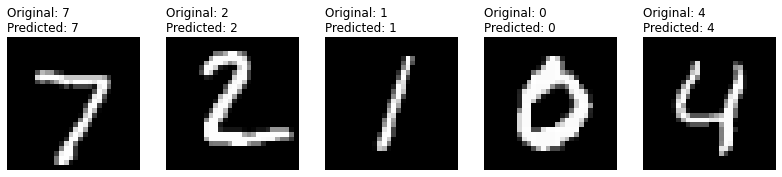

In [1]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import Sequential
from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt
import numpy as np

model = Sequential()
model.add(Conv2D(32, 3, activation='relu', input_shape=(28,28, 1)))
model.add(Conv2D(64, 3, activation='relu'))
model.add(Conv2D(128, 3, activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train / 255.0
X_train = np.expand_dims(X_train, axis=3)

X_test = X_test / 255.0
X_test = np.expand_dims(X_test, axis=3)

model.fit(X_train, y_train, batch_size=128, epochs=10)

score = model.evaluate(X_test, y_test)
print("Accuracy is: {}".format(score[1]))

predictions = model.predict(X_test)

plt.figure(figsize=(28, 28)) 
for i in range(5):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')
    original = y_test[i]
    predicted = np.argmax(predictions[i])
    plt.title("Original: {}\nPredicted: {}".format(original, predicted), loc='left')    
    plt.axis('off') 
plt.show()

model.save('model.h5')